## Using SVM to classify the Red Wine Dataset

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [15]:
df = pd.read_csv('../data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
# Classifying wine quality based on into two classes

df['label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
df['label'].value_counts()



label
1    855
0    744
Name: count, dtype: int64

In [23]:
# Splitting the dataset into features and labels
X = df.drop(['quality', 'label'], axis=1)
y = df['label']

# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the SVM model
svm_model=SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Making predictions
y_pred = svm_model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[109  32]
 [ 41 138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       141
           1       0.81      0.77      0.79       179

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320


Accuracy Score:
0.771875


#### Conclusion: Random Forest Classifier has better accuracy than SVM

## Visualization of the dataset

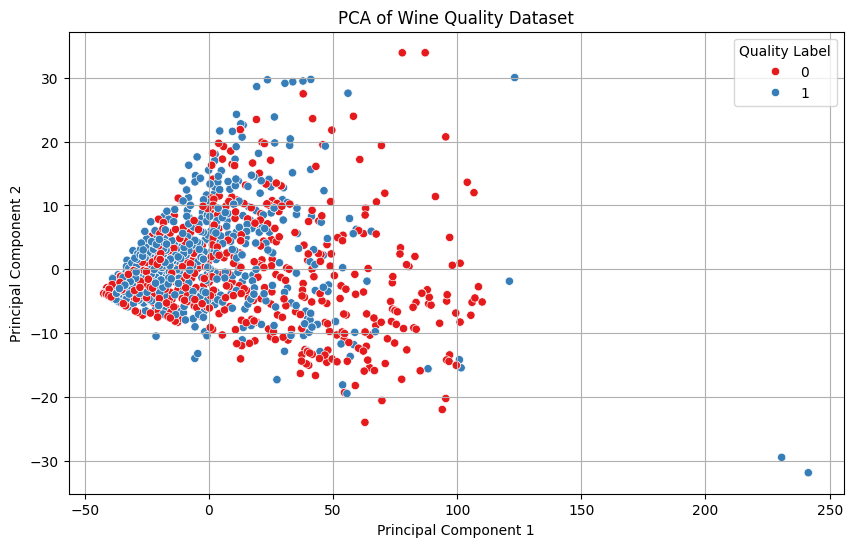

In [38]:
## Applying PCA to visualize the data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Creating a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = df['label']

# Plotting the PCA results

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='Set1')
plt.title('PCA of Wine Quality Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality Label')
plt.savefig('../Outputs/plots/wine_quality_pca.png')
plt.grid()
plt.show()